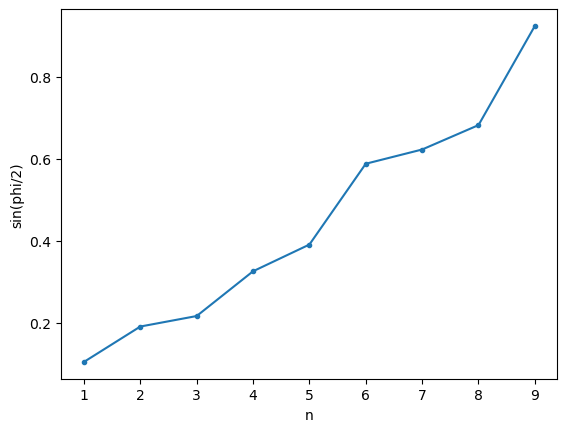

In [7]:
# 1

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(1, 10, 1)
phi = np.array([12, 22, 25, 38, 46, 72, 77, 86, 135])
error_phi = np.array([2, 4, 5, 6, 7, 10, 12, 16, 18])

y = np.sin((phi*np.pi/180)/2)
fig = plt.figure()
plt.plot(x, y, marker = '.')
plt.xlabel("n")
plt.ylabel("sin(phi/2)")
plt.show()

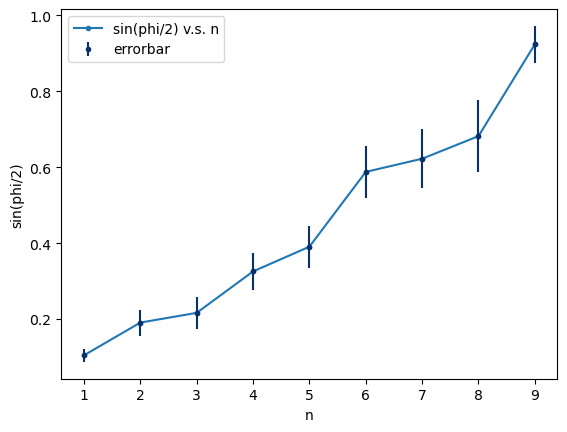

In [8]:
yerr = np.sin((phi+error_phi)*np.pi/360)-np.sin((phi)*np.pi/360)

plt.plot(x, y, marker=".", label ="sin(phi/2) v.s. n")
plt.errorbar(x, y, yerr, marker =".", ls ="None", color = plt.cm.Blues(1.3,1.0) , label = 'errorbar')
plt.xlabel("n")
plt.ylabel("sin(phi/2)")
plt.legend(loc="upper left")
plt.show()

In [61]:
slope = (sum(x*y)-9*np.mean(x)*np.mean(y))/(sum(x**2)-9*np.mean(x)**2)
print("slope:",format(slope,'.4f'))

line_fit = slope*x

(line_fit-y)**2

lam = 0.0711*(10**(-9))
d = lam/(2*slope)*10**9 # in nm
print(f"The value of d is", format(d,'.3f'), 'nm') # in m


slope: 0.0971
The value of d is 0.366 nm


In [29]:
# 2

V, Verr = 12-0.2, 0.3 # in V
R, Rerr = 10*10**3, 0.2*10**3 # in ohm
S = 0.2

cov = np.array([[Verr*2+S**2,0], [0, Rerr**2]])
print(cov)

[[6.4e-01 0.0e+00]
 [0.0e+00 4.0e+04]]


In [30]:
I = V/R
Ierr = I*np.sqrt(cov[0][0]/V**2+cov[1][1]/R**2)

print("I =", format(I*1000,'.3f'), "+/-", format(Ierr*1000, '.3f'), 'mA')

I = 1.180 +/- 0.083 mA


In [31]:
# 3

import statistics as stat

def estimators(rv, N):

    mean = sum(rv)/N

    rv_sort = np.sort(rv)
    median = 1/2*(rv_sort[4]+rv_sort[5])

    rv_multiply = 1
    for x in rv:
        rv_multiply = rv_multiply*x
    g_mean = rv_multiply**(1/N)

    rv_uni = np.unique(rv)
    if len(rv) != len(rv_uni):
        mode = stat.mode(rv)
    else:
        mode = np.nan

    return mean, median, g_mean, mode

In [50]:
mean_la, median_la, g_mean_la, mode_la = [],[],[],[]
mean_lb, median_lb, g_mean_lb, mode_lb = [],[],[],[]


for i in range(10000):
    a = np.random.normal(170, 5, size=10) # cuz width is 10, so the std is 5
    b = np.random.uniform(165, 175, size= 10) # width is 10, so range is from 165-175

    mean_a, median_a, g_mean_a, mode_a = estimators(a,10)
    mean_la.append(mean_a)
    median_la.append(median_a)
    g_mean_la.append(g_mean_a)
    mode_la.append(mode_a)

    mean_b, median_b, g_mean_b, mode_b = estimators(b,10)
    mean_lb.append(mean_b)
    median_lb.append(median_b)
    g_mean_lb.append(g_mean_b)
    mode_lb.append(mode_b)

def var(arr):

    arr = np.array(arr)
#     var = sum((arr-np.mean(arr))**2)/10000
    var = np.var(arr)

    return var


def bias(arr):

    arr = np.array(arr)
    bias = np.mean(arr)-170

    return bias

In [51]:
print("mean of Gaussian distribution: bias", bias(mean_la), ", variance", var(mean_la))
print("median of Gaussian distribution: bias", bias(median_la), ", variance", var(median_la))
print("geometry mean of Gaussian distribution: bias", bias(g_mean_la), ", variance", var(g_mean_la))
print("mode of Gaussian distribution: bias", bias(mode_la), ", variance", var(mode_la))
print("\n")
print("mean of uniform distribution: bias", bias(mean_lb), ", variance", var(mean_lb))
print("median of uniform distribution: bias", bias(median_lb), ", variance", var(median_lb))
print("geometry mean of uniform distribution: bias", bias(g_mean_lb), ", variance", var(g_mean_lb))
print("mode of uniform distribution: bias", bias(mode_lb), ", variance", var(mode_lb))

mean of Gaussian distribution: bias -0.04698694440750728 , variance 9.831003641989964
median of Gaussian distribution: bias -0.06271613526411102 , variance 13.551927843014887
geometry mean of Gaussian distribution: bias -0.31493954795641343 , variance 9.877880252402491
mode of Gaussian distribution: bias nan , variance nan


mean of uniform distribution: bias -0.008983320790378002 , variance 3.325130696275613
median of uniform distribution: bias -0.01832616646223073 , variance 7.631246457643917
geometry mean of uniform distribution: bias -0.09753241262319534 , variance 3.3265683507520736
mode of uniform distribution: bias nan , variance nan
